In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('Spotify_Youtube.csv')

# Basic info

In [33]:
# Features and basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [34]:
# Summary statistics for the dataset
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


For this exploration, we only want to look at numerical columns:

In [35]:
# display Numerical and Categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical Columns: {len(numerical_columns)}")
print(numerical_columns)
print(f"Categorical Columns: {len(categorical_columns)}")
print(categorical_columns)
print(f"Total Columns: {len(df.columns)}")

Numerical Columns: 16
['Unnamed: 0', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']
Categorical Columns: 12
['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Url_youtube', 'Title', 'Channel', 'Description', 'Licensed', 'official_video']
Total Columns: 28


# Sub-sampling

In [36]:
# Sub-samples for observation purpose
df_only_numerical = df[numerical_columns]
df_only_numerical.sample(n=10)

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
9147,9147,0.656,0.781,8.0,-7.657,0.0360,0.00661,0.000008,0.0926,0.478,130.280,298227.0,2.466500e+04,473.0,17.0,9.793044e+07
1089,1089,0.727,0.974,4.0,-2.261,0.0664,0.10300,0.000532,0.1740,0.965,79.526,235213.0,6.436810e+08,4762306.0,157039.0,1.004053e+09
14650,14650,0.716,0.654,8.0,-6.702,0.2790,0.24900,0.000000,0.1270,0.958,180.110,186833.0,1.404256e+08,1450788.0,30511.0,1.317186e+08
5833,5833,0.346,0.495,8.0,-8.276,0.0718,0.27300,0.000000,0.1650,0.330,203.983,99583.0,4.883820e+05,15204.0,496.0,9.987028e+06
8673,8673,0.607,0.807,0.0,-6.548,0.1260,0.00670,0.000001,0.2510,0.565,128.046,210560.0,9.910088e+07,332224.0,25407.0,2.078598e+07
4663,4663,0.482,0.786,7.0,-5.735,0.0320,0.00321,0.000089,0.4460,0.793,126.755,323000.0,7.440452e+07,712626.0,26873.0,5.051971e+08
9205,9205,0.459,0.477,1.0,-13.075,0.0326,0.63900,0.000006,0.1050,0.744,138.255,153600.0,1.969517e+07,107676.0,4226.0,8.060513e+06
17157,17157,0.794,0.757,6.0,-6.644,0.1230,0.02670,0.000306,0.0621,0.615,107.990,186680.0,1.165017e+07,159858.0,2505.0,9.363741e+07
16112,16112,0.746,0.780,0.0,-4.892,0.1020,0.31900,0.000000,0.4110,0.569,105.931,215200.0,1.208728e+07,118153.0,2222.0,1.264296e+08
19230,19230,0.804,0.787,10.0,-3.824,0.0746,0.14000,0.000000,0.0927,0.562,91.974,309120.0,1.979060e+09,5920550.0,107535.0,1.067736e+09


<Axes: >

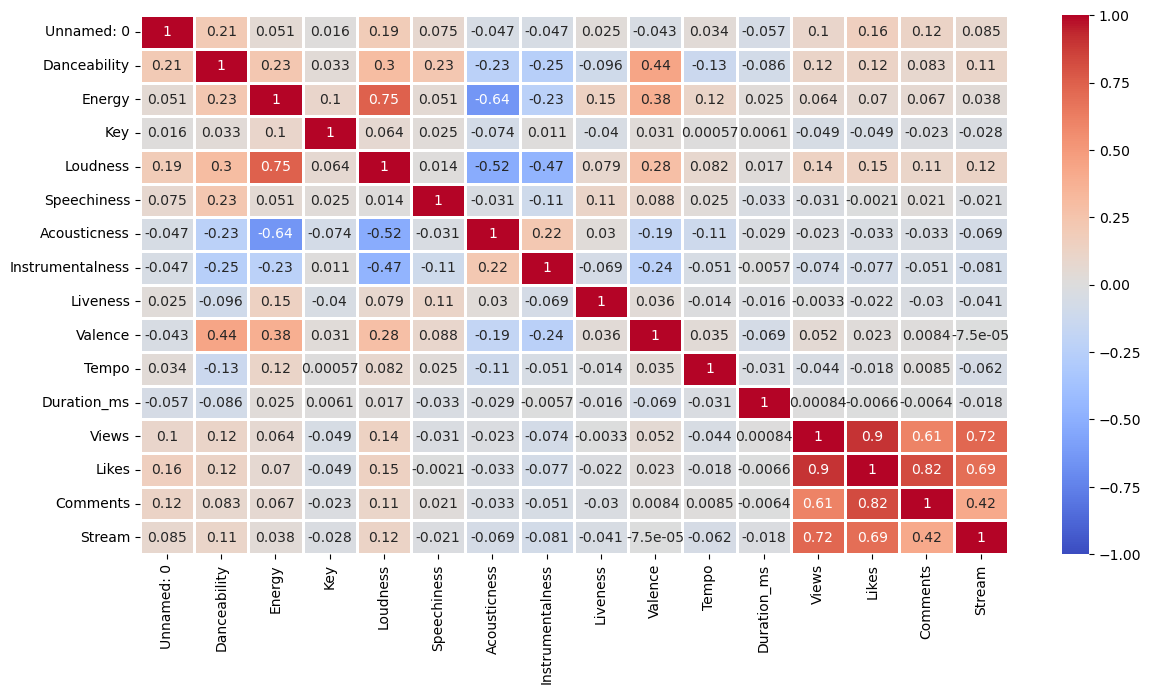

In [37]:
SAMPLE_SIZE = 1000
# Picking a random sample of observations so that it is less time consuming and compute intensive to create heatmap
df_only_numerical_subsample = df_only_numerical.sample(SAMPLE_SIZE)

# To set the size of the figure in which the correlation heatmap is displyed
plt.figure(figsize=(14, 7))
sns.heatmap(df_only_numerical_subsample.corr(method='pearson'), annot = True, linewidth=1, fmt='.2g',
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', annot_kws={"fontsize": 10})

# Heatmap

In [38]:
# display most frequent artists
n = 5
freq_artists = df['Artist'].value_counts()[:n].index.tolist()
freq_artists

['Gorillaz',
 'Die drei !!!',
 'Hollywood Undead',
 'Empire of the Sun',
 'White Noise for Babies']

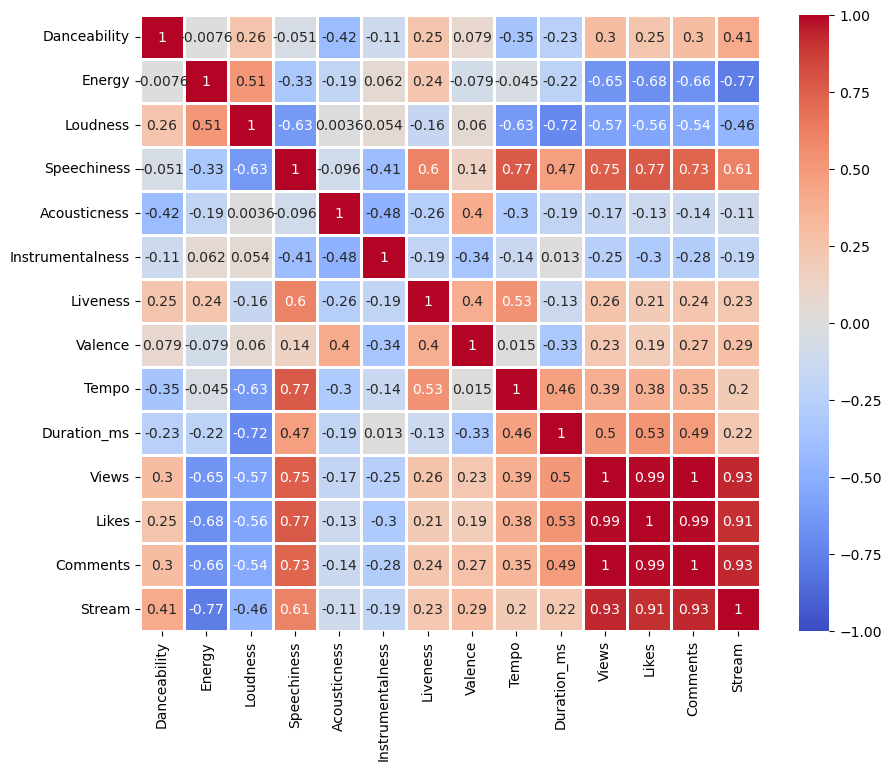

In [39]:
# looking for trends in songs of the SAME ARTIST

df_Gorillaz = df[df['Artist'] == 'Gorillaz']
num_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
            "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms",
            "Views", "Likes", "Comments", "Stream"]
df_Gorillaz_num = df_Gorillaz[num_cols]
plt.figure(figsize=(10, 8))
sns.heatmap(df_Gorillaz_num.corr(), vmin=-1, vmax=1, center= 0, linewidth=2,
            fmt='.2g', cmap= 'coolwarm', annot=True)
plt.show()

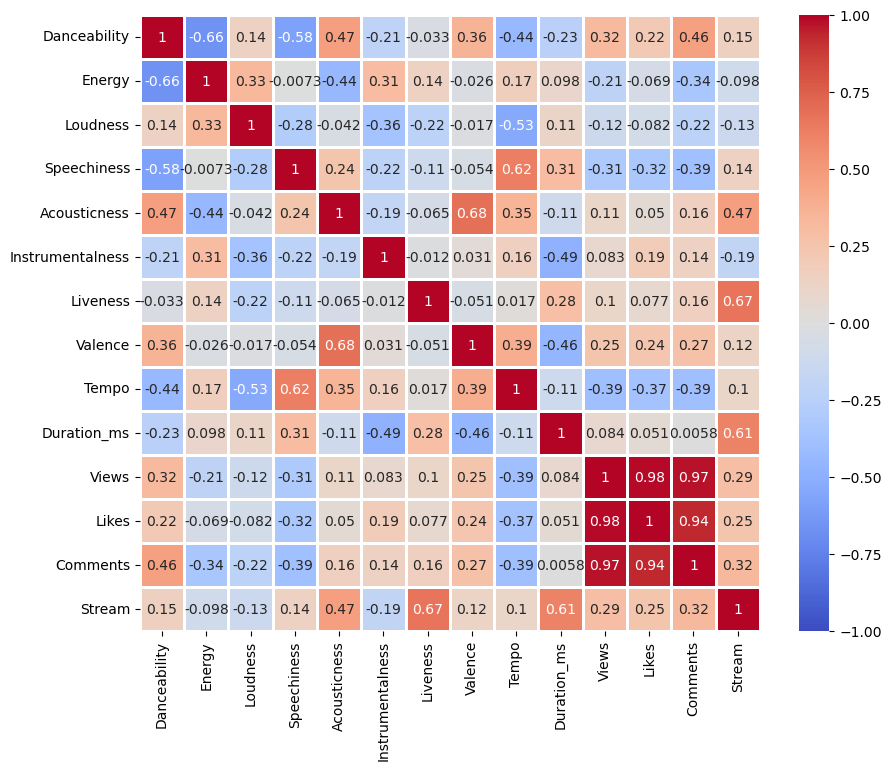

In [40]:
df_HU = df[df['Artist'] == 'Hollywood Undead']
num_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
            "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms",
            "Views", "Likes", "Comments", "Stream"]
df_HU_num = df_HU[num_cols]
plt.figure(figsize=(10, 8))
sns.heatmap(df_HU_num.corr(), vmin=-1, vmax=1, center= 0, linewidth=2, fmt='.2g',
            cmap= 'coolwarm', annot=True)
plt.show()

# Pairplot

c:\Users\Bryan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


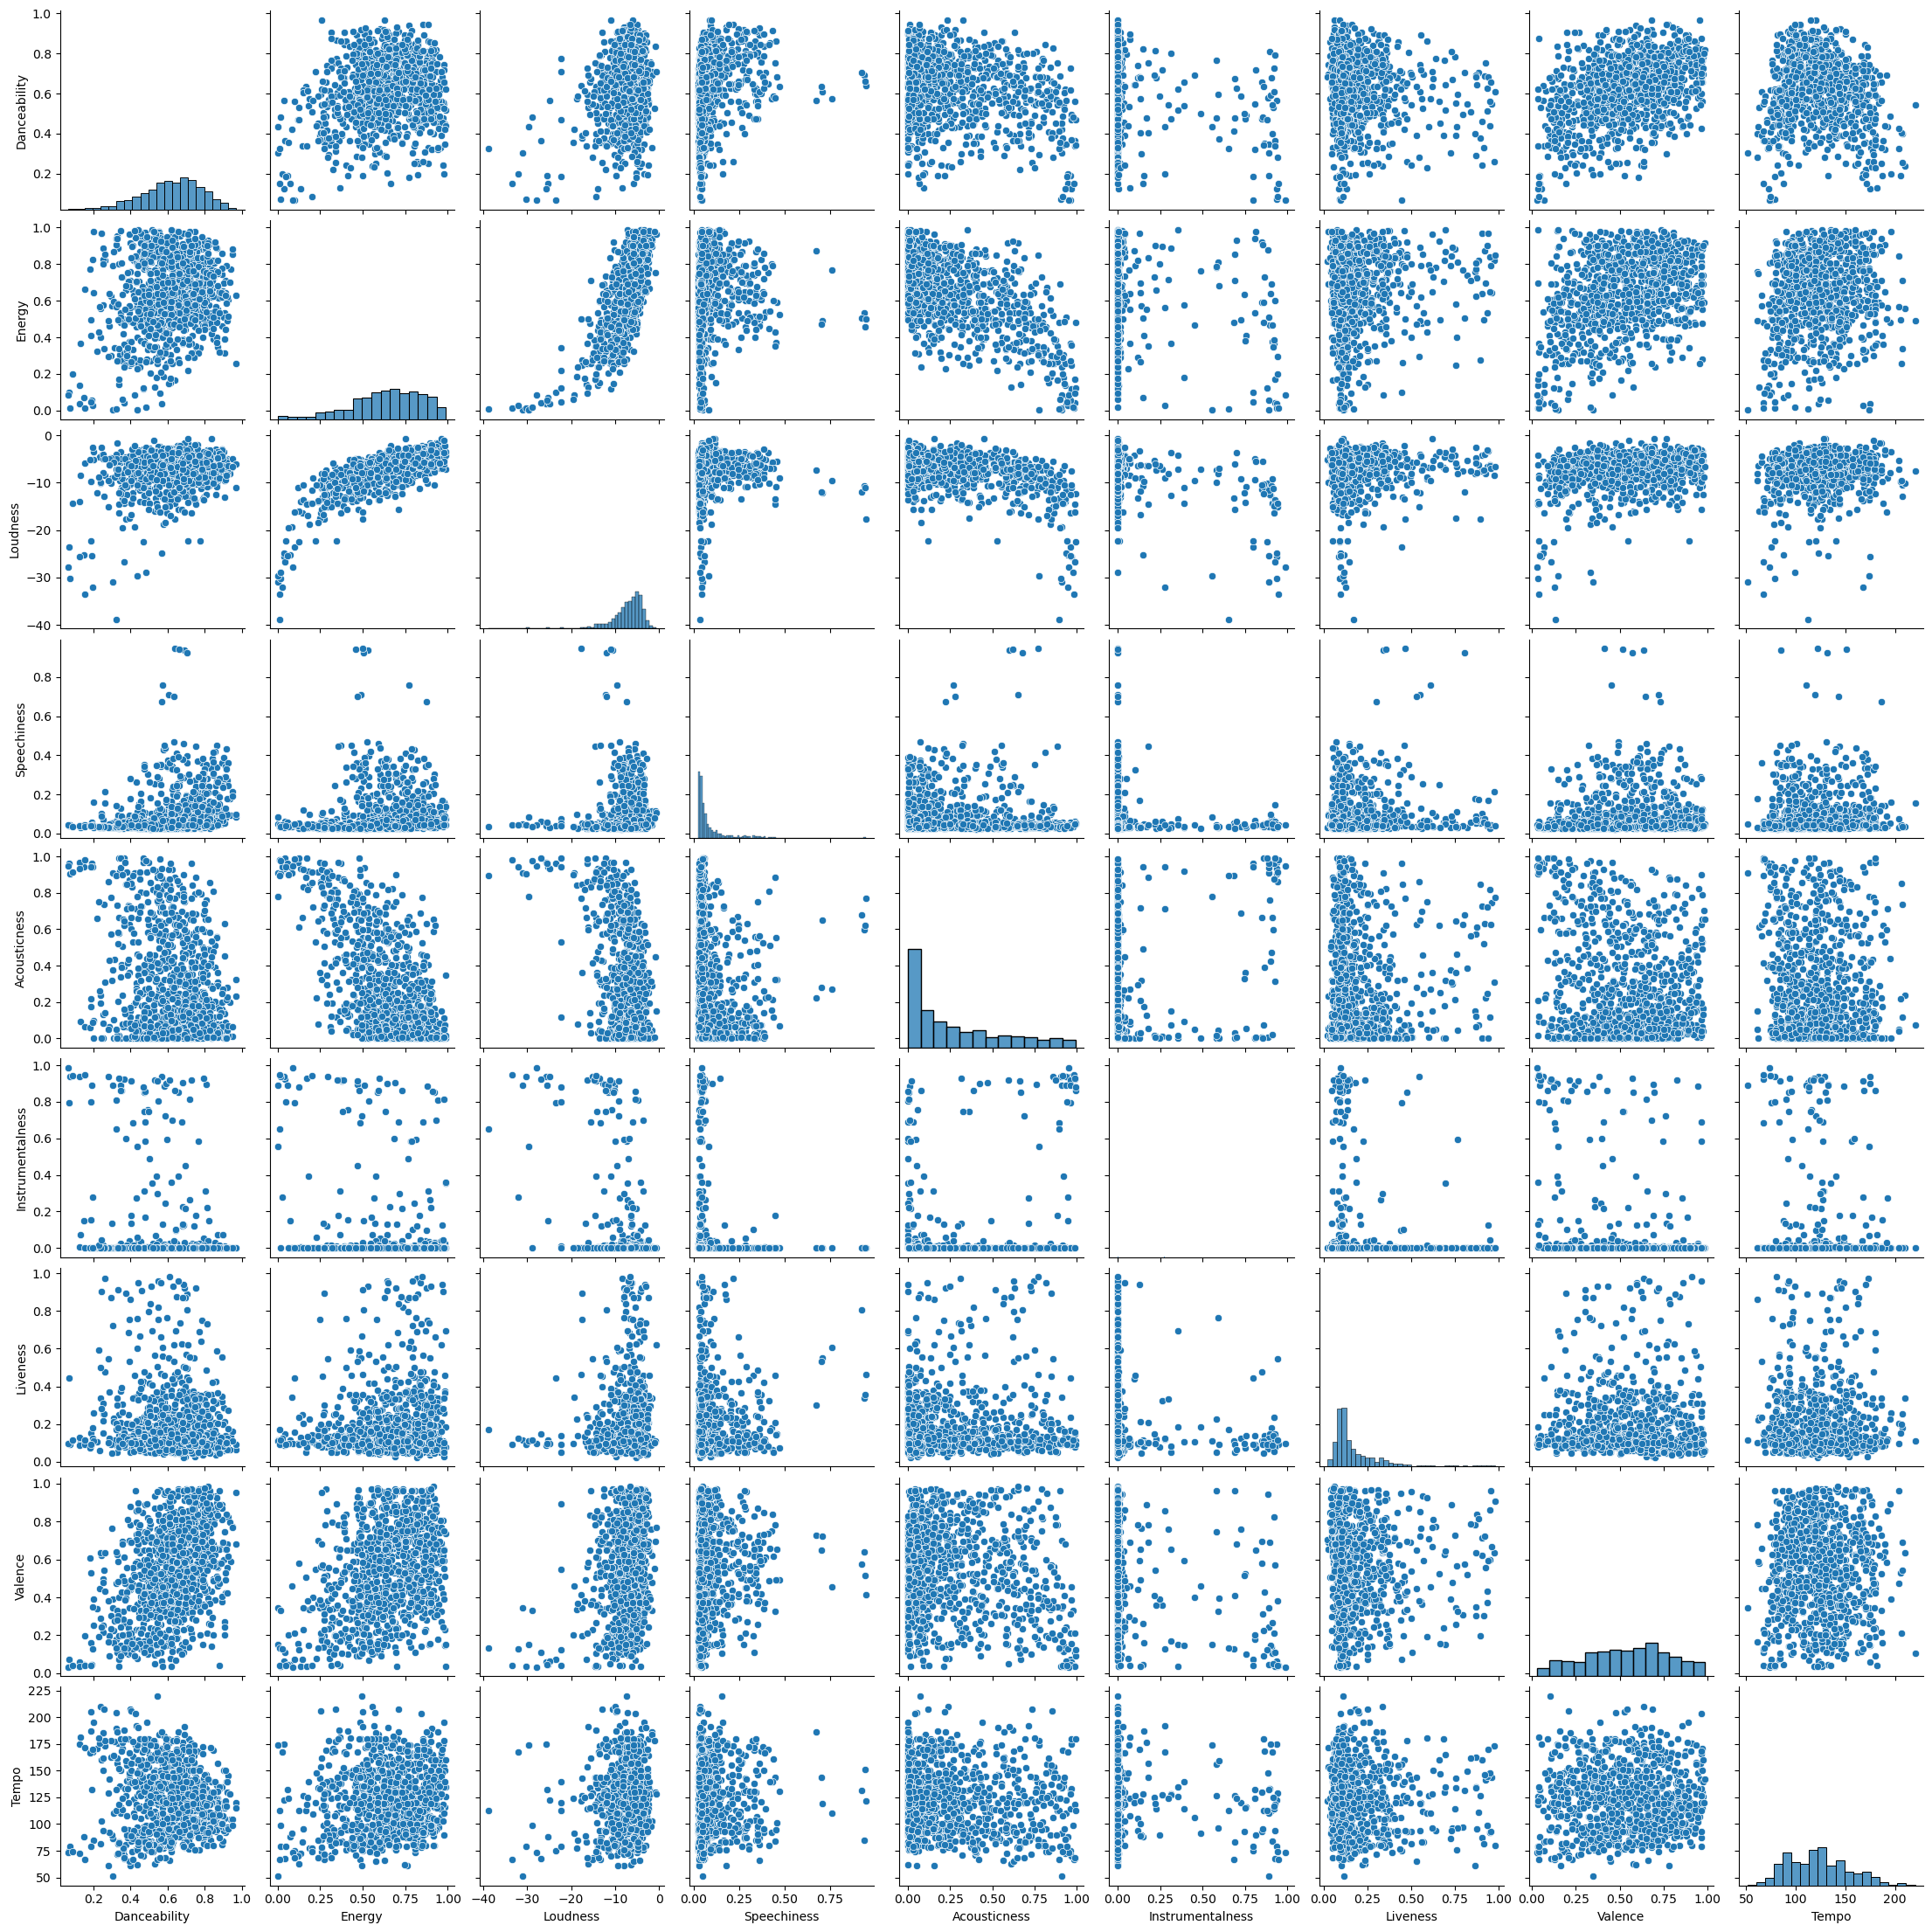

In [41]:
#generate pairplots for relavent numerical vairable
df_important = df_only_numerical_subsample[["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]]
sns.pairplot(df_important)
plt.show()

# Histogram

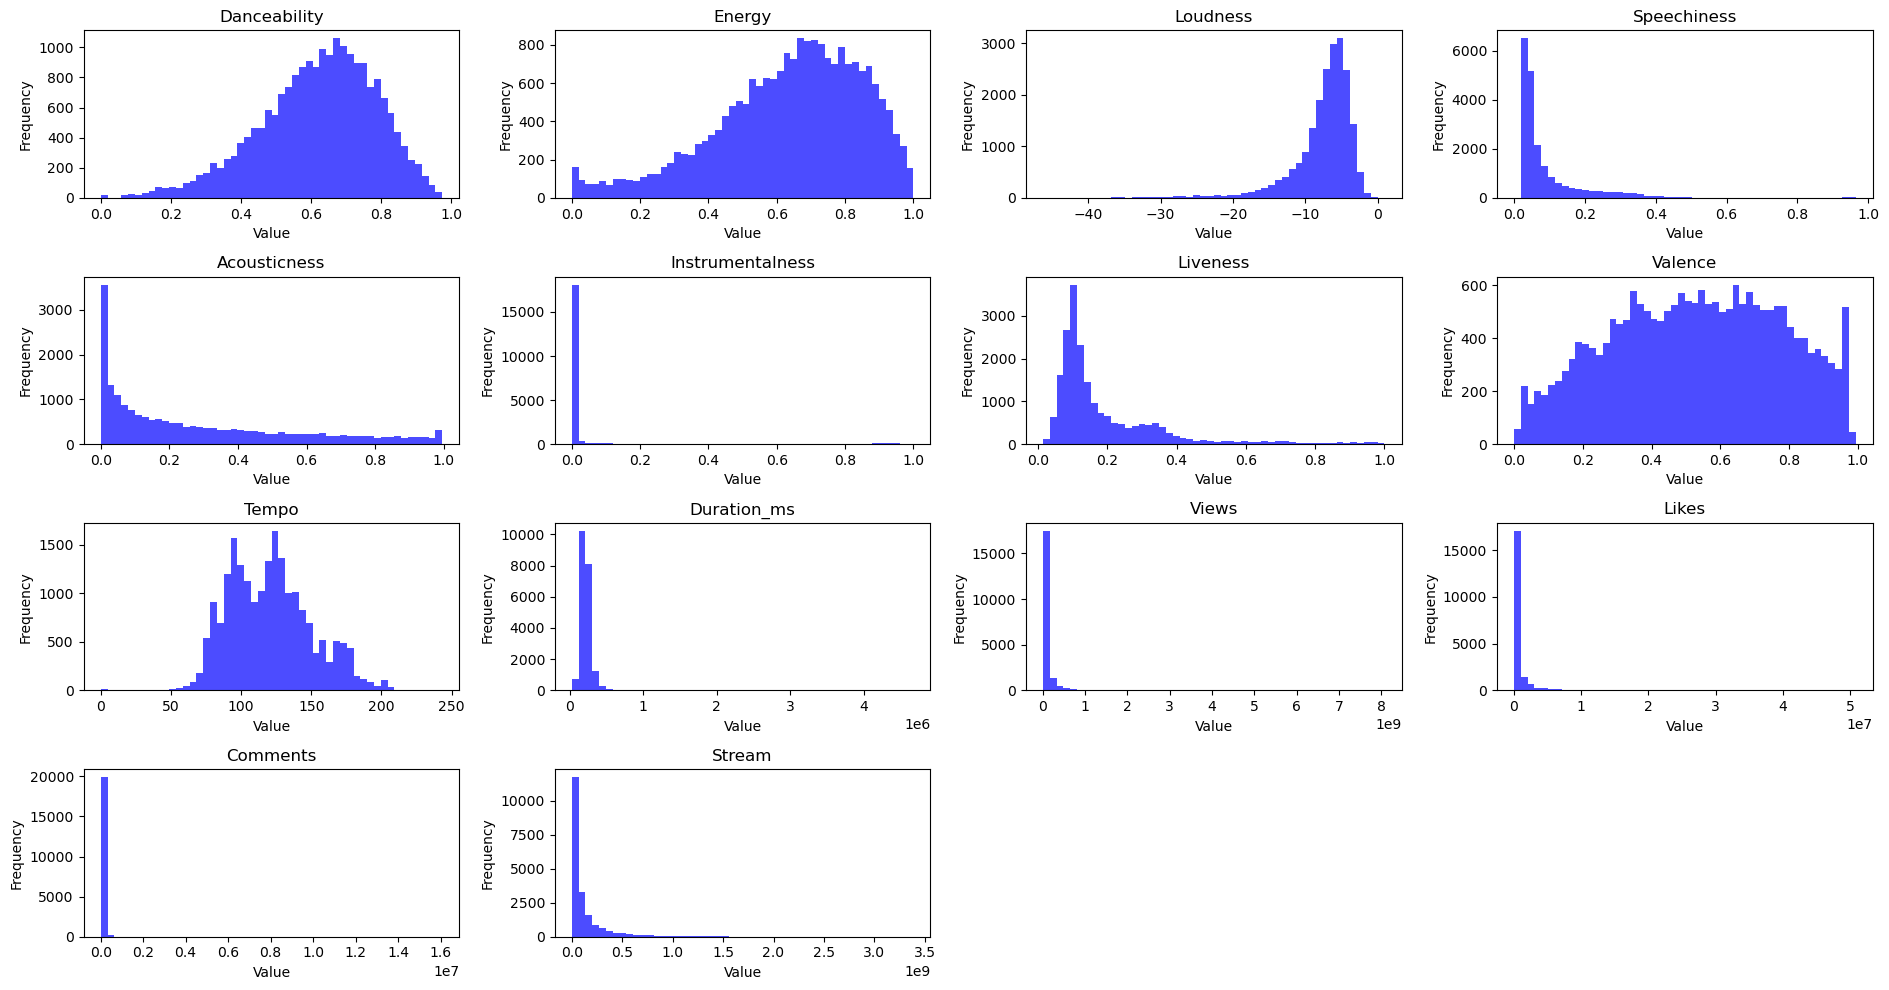

In [42]:
num_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
            "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms",
            "Views", "Likes", "Comments", "Stream"]

# Calculate the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns in the subplot grid
n_rows = len(num_cols) // n_cols + (1 if len(num_cols) % n_cols > 0 else 0)  # Calculate rows, add an extra row if needed

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(19, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for idx, column in enumerate(num_cols):
    axs[idx].hist(df[column], bins=50, color='blue', alpha=0.7)
    axs[idx].set_title(column)
    axs[idx].set_ylabel('Frequency')
    axs[idx].set_xlabel('Value')

# Hide any empty subplots
for ax in axs[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


As we can see from the above graphs, some data categories like views, likes, comments, and streams are highly skewed. Therefore, we need to scale them logarithmicly to normalize them:

# Histogram with logarithmic transformation

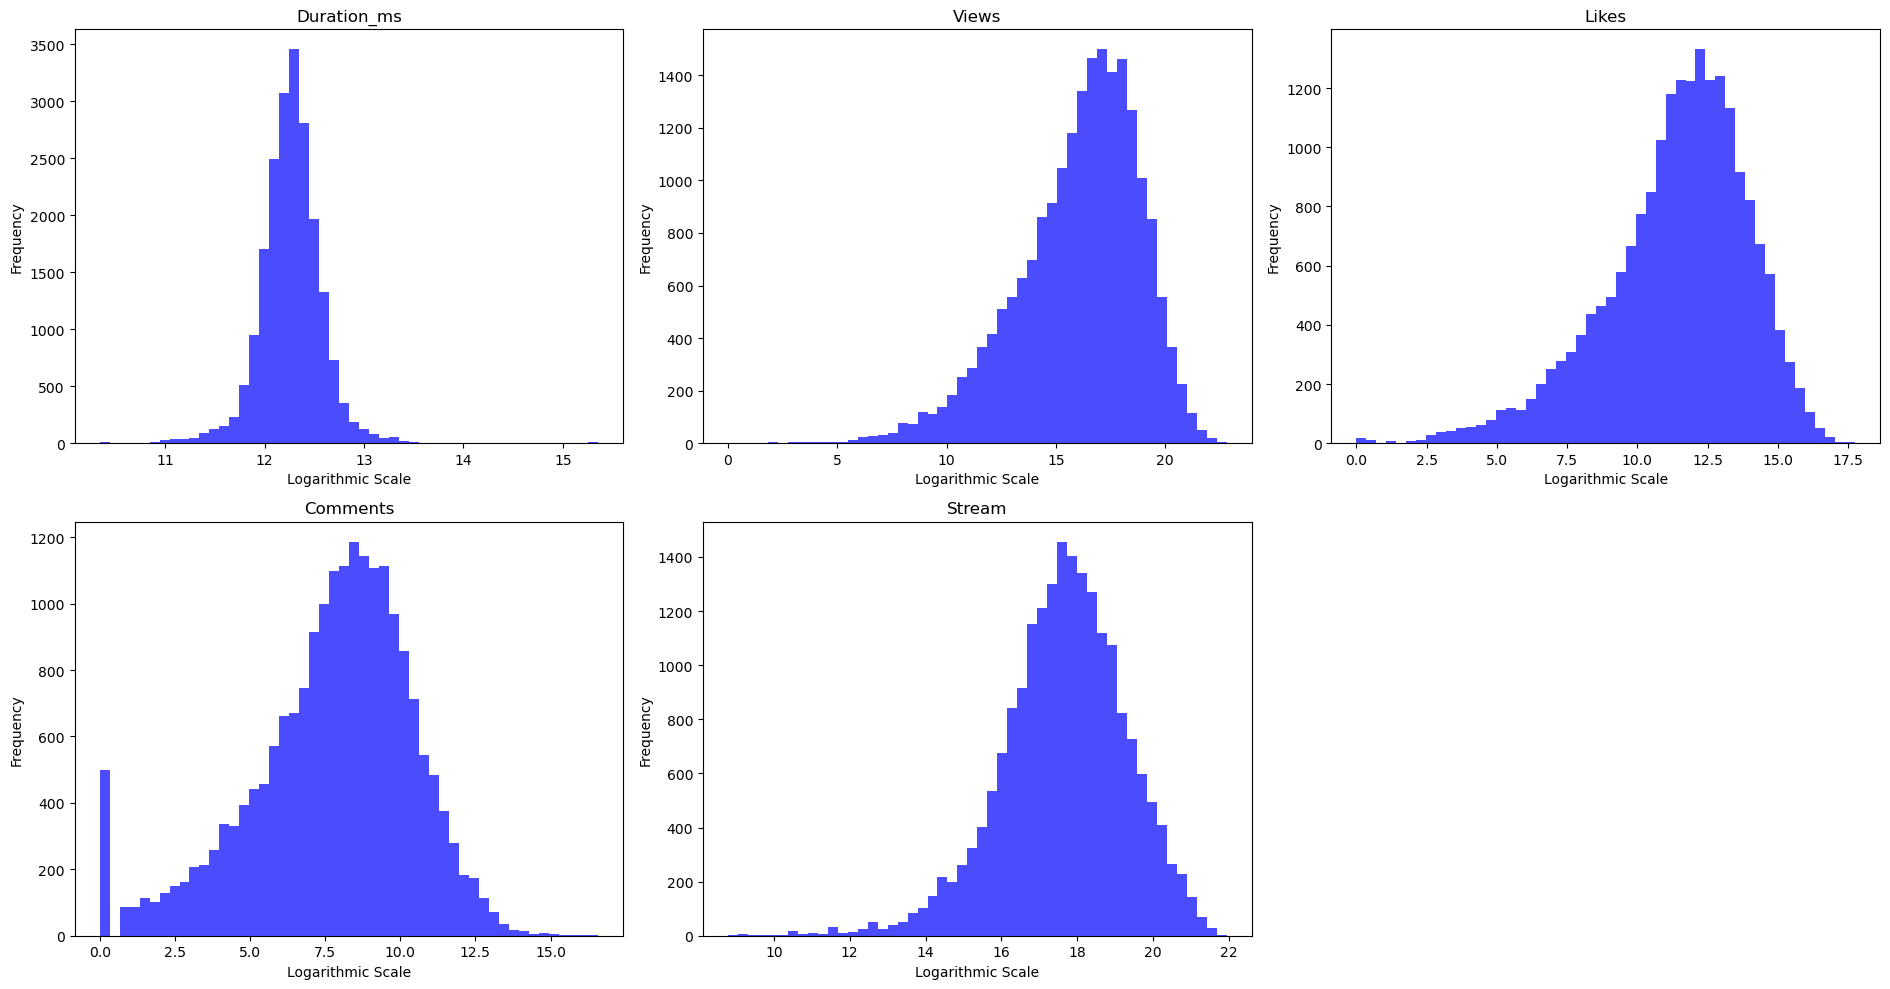

In [43]:
logarithmic_categories = ["Duration_ms", "Views", "Likes", "Comments", "Stream"]

# Calculate the number of rows and columns for the subplot grid
n_cols = 3
n_rows = len(logarithmic_categories) // n_cols + (1 if len(logarithmic_categories) % n_cols > 0 else 0)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(19, 10))
axs = axs.flatten()

for idx, column in enumerate(logarithmic_categories):
    # Apply a logarithmic transformation with a small shift to handle zero values
    logarithmic_data = np.log(df[column] + 1)
    axs[idx].hist(logarithmic_data, bins=50, color='blue', alpha=0.7)
    axs[idx].set_title(column)
    axs[idx].set_xlabel('Logarithmic Scale')
    axs[idx].set_ylabel('Frequency')

# Hide any empty subplots
for ax in axs[len(logarithmic_categories):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# Pie charts

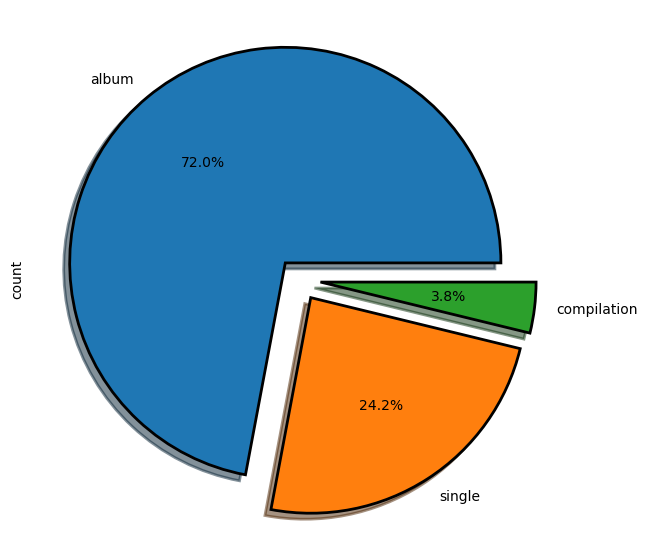

In [44]:
df_only_categorical = df[categorical_columns]
df_only_categorical['Album_type'].value_counts()

fig = plt.figure(figsize=(10, 7))
df_only_categorical['Album_type'].value_counts().plot(kind='pie', autopct='%0.1f%%',shadow=True,explode=(0.1,0.1,0.1),wedgeprops={'linewidth':2,'edgecolor':'black'})

plt.show()

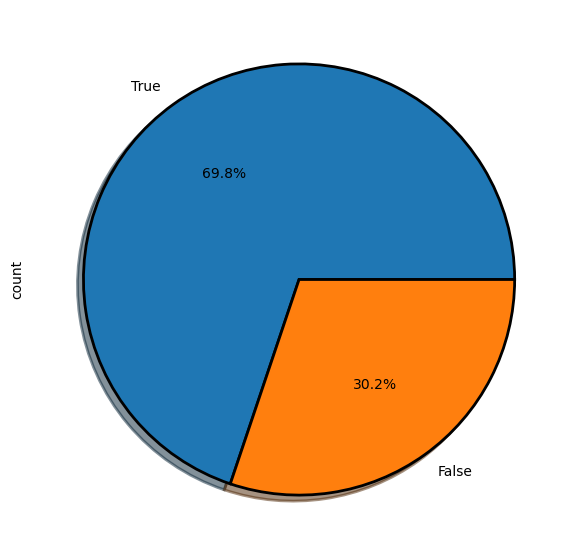

In [45]:
fig = plt.figure(figsize=(10, 7))
df_only_categorical['Licensed'].value_counts().plot(kind='pie', autopct='%0.1f%%',shadow=True,wedgeprops={'linewidth':2,'edgecolor':'black'})

plt.show()

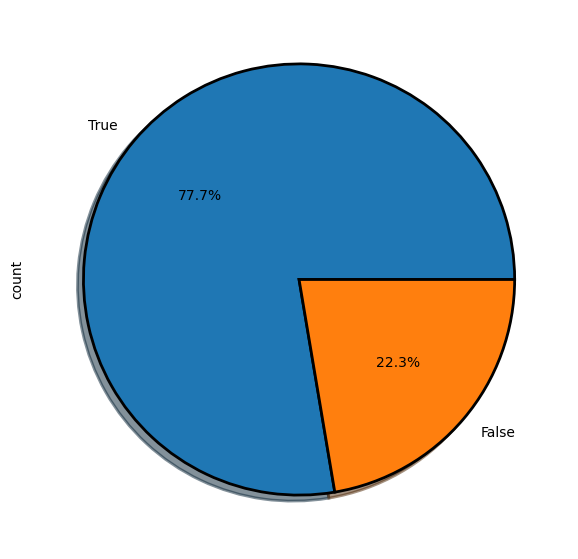

In [46]:
fig = plt.figure(figsize=(10, 7))
df_only_categorical['official_video'].value_counts().plot(kind='pie', autopct='%0.1f%%',shadow=True,wedgeprops={'linewidth':2,'edgecolor':'black'})

plt.show()

#Dropping Irrelevant Features

We would want to drop some features from our dataset that are not relevant for hte purposes of traning the model. They will however be used in later stages of this project.

These are columns that hold values which are unique to each of the records in our dataset. Some of these include the song's title, url, description, etc.

In the end after the model is trained and when we provide song recommendations to users after performing clustering, this information would be used.

In [47]:
def drop_irrelevant_cols(df, irrelevant_columns):

    input_num_cols = df.shape[1]
    print(f"The original dataset has {input_num_cols} columns", end = "\n\n")

    df = df.drop(columns=irrelevant_columns)
    print(f"{len(irrelevant_columns)} columns were successfully dropped from the dataframe!")
    print(irrelevant_columns, end = "\n\n")

    output_num_cols = df.shape[1]
    print(f"The final dataset has {output_num_cols} columns", end = "\n\n")

    return df

In [48]:
irrelevant_columns = ['Url_youtube', 'Url_spotify', 'Uri', 'Title', 'Description', 'Unnamed: 0', 'Track', 'Album', 'Channel', 'Licensed', 'official_video']
df = drop_irrelevant_cols(df, irrelevant_columns)
df.head()

The original dataset has 28 columns

11 columns were successfully dropped from the dataframe!
['Url_youtube', 'Url_spotify', 'Uri', 'Title', 'Description', 'Unnamed: 0', 'Track', 'Album', 'Channel', 'Licensed', 'official_video']

The final dataset has 17 columns



,Artist,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,Gorillaz,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,Gorillaz,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,Gorillaz,single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,Gorillaz,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08
4,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08


#Data Imputation

There are some records in the dataset that have null values. Since this only applies to less than 3 percent of the data, we will be dropping it.

In [49]:
def drop_null_values(df):

    initial_num_rows = df.shape[0]
    print(f"Number of rows in the dataframe before dropping nulls: {initial_num_rows}", end = "\n\n")

    df.dropna(inplace=True)
    print(f"Null values were dropped from the dataframe!", end = "\n\n")

    output_num_rows = df.shape[0]
    print(f"Number of rows in the dataframe after dropping nulls: {output_num_rows}", end = "\n\n")

    return df

In [50]:
df = drop_null_values(df)
df.head()

Number of rows in the dataframe before dropping nulls: 20718

Null values were dropped from the dataframe!

Number of rows in the dataframe after dropping nulls: 19549



,Artist,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,Gorillaz,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,Gorillaz,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,Gorillaz,single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,Gorillaz,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08
4,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08


#Data Encoding (One Hot)

In [51]:
def oneHotEncodeFeatures(df, feature_list):

    print("Features we are encoding:")
    print(feature_list, end = "\n\n")
    encoder = OneHotEncoder()

    print(f"Number of columns before one hot encoding {df.shape[1]}", end = "\n\n")

    encoded_df = pd.DataFrame(encoder.fit_transform(df[feature_list]).toarray())
    print("One hot encoding completed!", end = "\n\n")

    df.drop(columns=feature_list)

    df = df.join(encoded_df)

    print(f"Number of columns before one hot encoding {df.shape[1]}", end = "\n\n")

    return df

In [52]:
df = oneHotEncodeFeatures(df, ['Key',  'Album_type'])
df

Features we are encoding:
['Key', 'Album_type']

Number of columns before one hot encoding 17

One hot encoding completed!

Number of columns before one hot encoding 32



,Artist,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,...,5,6,7,8,9,10,11,12,13,14
0,Gorillaz,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Gorillaz,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Gorillaz,single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Gorillaz,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,single,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20714,SICK LEGEND,single,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20715,SICK LEGEND,single,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20716,SICK LEGEND,single,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Encoding (Frequency (popularity) Encoding)

In [53]:
#Let's try frequency based encoding!


def prep_view_based_encoding_artist(df):
    # Calculate the total views for each artist
    artist_views = df.groupby('Artist')['Views'].sum().reset_index()
    artist_views.columns = ['Artist', 'TotalViews']

    # Sort artists by total views (highest first)
    artist_views = artist_views.sort_values('TotalViews', ascending=False).reset_index(drop=True)

    # Create a mapping from artist names to a numeric label based on total views
    artist_to_numeric = {artist: i for i, artist in enumerate(artist_views['Artist'])}

    # Map the artist names in the original dataframe to their numeric labels based on views
    df['Artist_encoded'] = df['Artist'].map(artist_to_numeric)
    df['Artist_encoded'] = df['Artist_encoded'].fillna(-1).astype(int)

    return df


def prep_view_based_encoding_album(df):
    # Calculate the total views for each artist
    album_views = df.groupby('Album')['Views'].sum().reset_index()
    album_views.columns = ['Album', 'TotalViews']

    # Sort artists by total views (highest first)
    album_views = album_views.sort_values('TotalViews', ascending=False).reset_index(drop=True)

    # Create a mapping from artist names to a numeric label based on total views
    album_to_numeric = {album: i for i, album in enumerate(album_views['Album'])}

    # Map the artist names in the original dataframe to their numeric labels based on views
    df['Album_encoded'] = df['Album'].map(album_to_numeric)
    df['Album_encoded'] = df['Album_encoded'].fillna(-1).astype(int)

    return df



In [54]:
prep_view_based_encoding_artist(df)
df

,Artist,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,...,6,7,8,9,10,11,12,13,14,Artist_encoded
0,Gorillaz,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,225
1,Gorillaz,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,225
2,Gorillaz,single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,225
3,Gorillaz,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,225
4,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,single,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026
20714,SICK LEGEND,single,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026
20715,SICK LEGEND,single,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026
20716,SICK LEGEND,single,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026


#Data Preprocessing (Logarithmic Transformation and Normalization)

In [55]:
def log_and_normalize(series):
    return np.log(series + 1) / np.linalg.norm(np.log(series + 1))

def prep_normalize_unnormalized(df):
    logarithmic_categories = ["Duration_ms", "Views", "Likes", "Comments", "Stream"]
    for column in logarithmic_categories:
        df[column] = log_and_normalize(df[column])

    return df

def normalize_loudness(df):
    df['Loudness'] -= np.min(df['Loudness'])
    df['Loudness'] /= np.linalg.norm(df['Loudness'])
    return df

def prep_normalize(df):
    df = prep_normalize_unnormalized(df)
    df = normalize_loudness(df)
    return df


In [56]:
df = prep_normalize(df)
df

,Artist,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,...,6,7,8,9,10,11,12,13,14,Artist_encoded
0,Gorillaz,album,0.818,0.705,6.0,0.007277,0.1770,0.008360,0.002330,0.6130,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,225
1,Gorillaz,album,0.676,0.703,8.0,0.007436,0.0302,0.086900,0.000687,0.0463,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,225
2,Gorillaz,single,0.695,0.923,1.0,0.007783,0.0522,0.042500,0.046900,0.1160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,225
3,Gorillaz,album,0.689,0.739,2.0,0.007437,0.0260,0.000015,0.509000,0.0640,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,225
4,Gorillaz,album,0.663,0.694,10.0,0.006919,0.1710,0.025300,0.000000,0.0698,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,single,0.582,0.926,5.0,0.007339,0.0328,0.448000,0.000000,0.0839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026
20714,SICK LEGEND,single,0.531,0.936,4.0,0.008177,0.1370,0.028000,0.000000,0.0923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026
20715,SICK LEGEND,single,0.443,0.830,4.0,0.007645,0.0647,0.024300,0.000000,0.1540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026
20716,SICK LEGEND,single,0.417,0.767,9.0,0.007769,0.4190,0.356000,0.018400,0.1080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026
